# Detecting key modulation using variational inference

### The model

Given a dataset $S$ of samples of the form $(n,t)$ where $n$ is a note and $t$ is the time instant that note occurs, organized in histograms as $(h_t)_{t=1}^T$ where $h_t$ is a vector storing the number of occurrences of each note at time $t$, assign to each time instant $t$ a region $z_t \in \{1..R\}$, with each region $r$ assigned a key $k_r \in \{1..K\}$ such that notes at time $t$ are assumed to be generated by the key at the region $t$ belongs to. The complete data likelihood is given by
$$p(S,Z,K|F,\lambda, \mu, \tau) = p(K|F) \prod_{t=1}^T p(z_t|\lambda) p(t|z_t, \mu, \tau) p(h_t|z_t,t) = \prod_{r=1}^R \prod_{k=1}^K f_{rk}^{k_{rk}} \prod_{t=1}^T \left[ \lambda_r \prod_{n=1}^N \left[\mathcal{N}(t|\mu_r, \tau^{-1}) \prod_{k=1}^K p(n|k)^{k_{rk}} \right]^{h_{nt}} \right]^{z_{tr}}.$$
The model parameters have the prior distributions
$$p(F) = \prod_{r=1}^R \text{Dir}(f_r|u^F), \ p(\lambda) = \text{Dir}(\lambda|u^\lambda), \ p(\mu, \tau) = \text{Ga}(\tau|a_0, b_0) \prod_{r=1}^R \mathcal{N}(\mu_r|\mu_{0r}, (\eta_0 \tau)^{-1}).$$
We approximate the posterior distribution $p(Z,K,F,\lambda, \mu, \tau|S)$ by another distribution $q(Z,K,F,\lambda, \mu, \tau) = q(Z,K) q(F,\lambda, \mu, \tau)$ and optimize for $q$, yielding
$$\ln q(Z,K) = \langle \ln p(S,Z,K|F,\lambda, \mu, \tau) \rangle_{q(F,\lambda, \mu, \tau)} + \text{const} = \sum_{r=1}^R \sum_{k=1}^K k_{rk} \langle f_{rk} \rangle_{q(F,\lambda, \mu, \tau)} + \sum_{t=1}^T z_{tr} k_{rk} \left[ \langle \ln \lambda_r \rangle_{q(F,\lambda, \mu, \tau)} + \sum_{n=1}^N h_{nt} \left[ - \frac{1}{2}(\langle \tau \mu_r^2 \rangle_{q(F,\lambda, \mu, \tau)} - 2 t \langle \tau \mu_r \rangle_{q(F,\lambda, \mu, \tau)}) + \ln p(n|k) \right] \right] + \text{const},$$
$$\ln q(F,\lambda, \mu, \tau) = \sum_{r=1}^R \sum_{k=1}^K \ln f_{rk} \left[u^F + \langle k_{rk} \rangle_{q(Z,K)} \right] + \sum_{r=1}^R \ln \lambda_r \left[u^\lambda + \sum_{t=1}^T \langle z_{tr} \rangle_{q(Z,K)} \right] + (a_0 + \frac{R + \sum_{r=1}^R \sum_{t=1}^T h_t \left \langle z_{tr} \right \rangle_{q(Z,K)}}{2} - 1) \ln \tau - b_0 \tau - \frac{\tau}{2} \sum_{r=1}^R \left [ \eta_0 (\mu_r - \mu_{0r})^2 + \sum_{t=1}^T h_t \left \langle z_{tr} \right \rangle_{q(Z,K)} (t- \mu_r)^2 \right ] + \text{const}$$
which further split into $q(Z,K) = q(K)q(Z|K)$ and $q(F,\lambda, \mu, \tau) = q(F) q(\lambda) q(\mu|\tau) q(\tau)$ with
$$q(F) = \prod_{r=1}^R \text{Dir}(f_r | u^F + \langle k_{r} \rangle_{q(Z,K)}), q(\lambda) = \text{Dir}(\lambda | u^\lambda + \sum_{t=1}^T \langle z_{tr} \rangle_{q(Z,K)}),$$
$$q(\mu|\tau) = \prod_{r=1}^R \mathcal{N}(\mu_r|\hat{\mu}_r, ((\eta_0 + N_r ) \tau )^{-1}), q(\tau) = \text{Ga}(a_0+\frac{h}{2}, b_0 + \sum_{r=1}^R \left[ \frac{\eta_0 \bar N_r}{\eta_0+N_r} (\bar \mu_r - \mu_{0r})^2 + \bar N_r \bar \sigma_r^2\right])$$
where $h_t = \sum_{n=1}^N h_{nt}$, $h = \sum_{t=1}^T h_t$, $\bar N_r = \sum_{t=1}^T h_t \left \langle z_{tr} \right \rangle$, $\bar \mu_r = \frac{1}{\bar N_r} \sum_{t=1}^T h_t t \left \langle z_{tr} \right \rangle$, $\bar \sigma_r^2 = \frac{1}{\bar N_r} \sum_{t=1}^T (t - \bar \mu_r)^2 h_t \left \langle z_{tr} \right \rangle$ and $\hat{\mu}_r = \frac{\eta_0 \mu_{0r} + \bar N_r \bar \mu_r}{\eta_0 + \bar N_r}$. The expected model parameters under these distributions are 
$$\langle \ln f_{rk} \rangle = \psi(\hat u^{f_r}_k) - \psi(\sum_{k=1}^K \hat u^{f_r}_k), \langle \ln \lambda_r \rangle = \psi(\hat u^{\lambda}_r) - \psi(\sum_{r=1}^R \hat u^{\lambda}_r),$$
$$\langle \tau \rangle = \frac{\hat a}{\hat b}, \langle \tau \mu_r \rangle = \frac{\hat a}{\hat b} \hat \mu_r, \langle \tau \mu_r^2 \rangle = \frac{\hat a}{\hat b} \hat \mu_r^2 + \hat \eta_r^{-1}$$
where $\hat u^{f_r}$, $\hat u^\lambda$, $(\hat \mu_r, (\hat \eta_r \tau)^{-1})$ and $(\hat a, \hat b)$ are the parameters of the distributions $q(f_r)$, $q(\lambda)$, $q(\mu_r|\tau)$ and $q(\tau)$ given above.

For now, approximate $q(Z,K)$ further into $q(Z)q(K)$ with 
$$\ln q(Z) = \sum_{t=1}^T \sum_{r=1}^R z_{tr} \left[\langle \ln \lambda_r \rangle + h_t \left[ - \frac{1}{2}(\langle \tau \mu_r^2 \rangle_{q(F,\lambda, \mu, \tau)} - 2 t \langle \tau \mu_r \rangle_{q(F,\lambda, \mu, \tau)}) + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] \right] + \text{const}$$
$$\ln q(K) = \sum_{r=1}^R \sum_{k=1}^K k_{rk} \left[ \langle \ln f_{rk} \rangle + \sum_{t=1}^T \langle z_{tr} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] + \text{const}$$
yielding
$$\langle z_{tr} \rangle = \sigma(\psi(\hat u^\lambda_r) - h_t \frac{\hat a}{2 \hat b} (t - \hat \mu_r)^2 - \frac{h_t}{2\hat\eta_r} + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k))$$
$$\langle k_{rk} \rangle = \sigma(\psi(\hat u^{f_r}_k) + \sum_{t=1}^T \langle z_{tr} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k))$$
where $\sigma$ denotes the softmax function.

The variational free energy minimized by the above variational distributions is given by
$$\mathcal{F}[q] = \langle \ln \frac{p(S,Z,K,F,\lambda,\mu,\tau)}{q(Z,K,F,\lambda,\mu,\tau)} \rangle_q = -D_{KL}(q(F)q(\lambda)q(\tau)q(\mu|\tau)\|p(F)p(\lambda)p(\tau)p(\mu|\tau)) - \langle D_{KL}(q(Z)q(K)\|p(Z|\lambda)p(K|F)) \rangle_{q(F)q(\lambda)} + \langle \langle \ln p(S|Z,K,\mu,\tau) \rangle_{q(Z)q(K)} \rangle_{q(F)q(\lambda)} = - \left[ \sum_{r=1}^R D_{KL}(q(f_r)|p(f_r)) + D_{KL}(q(\lambda)\|p(\lambda)) + D_{KL}(q(\tau)\|p(\tau)) + \sum_{r=1}^R \langle D_{KL}(q(\mu_r|\tau)\|p(\mu_r|\tau)) \rangle_{q(\tau)} + \sum_{t=1}^T D_{KL}(q(z_t)\|p(z_t)) + \sum_{r=1}^R  D_{KL}(q(k_r)\|p(k_r)) \right] + \langle \langle \ln p(S|Z,K,\mu,\tau) \rangle_{q(Z)q(K)} \rangle_{q(F)q(\lambda)q(\mu,\tau)}$$
with
$$D_{KL}(q(f_r)|p(f_r)) = \ln \frac{\Gamma(\hat u^{f_r}_0)}{\Gamma(K u^F)} - \sum_{k=1}^K \ln \frac{\Gamma(\hat u^{f_r}_k)}{\Gamma(u^F)} + (\hat u^{f_r}_k - u^F)(\psi(\hat u^{f_r}_k) - \psi(\hat u^{f_r}_0))$$
$$D_{KL}(q(\lambda)\|p(\lambda)) = \ln \frac{\Gamma(\hat u^{\lambda}_0)}{\Gamma(R u^\lambda)} - \sum_{r=1}^R \ln \frac{\Gamma(\hat u^{\lambda}_r)}{\Gamma(u^\lambda)} + (\hat u^\lambda_r - u^\lambda)(\psi(\hat u^{\lambda}_r) - \psi(\hat u^\lambda_0))$$
$$D_{KL}(q(\tau)\|p(\tau)) = a_0 \ln \frac{b_0}{\hat b} - \ln \frac{\Gamma(a_0)}{\Gamma(\hat a)} + (a_0 - \hat a) \psi(\hat a) - \hat a \frac{b_0 - \hat b}{\hat b}$$
$$\langle D_{KL}(q(\mu_r|\tau)\|p(\mu_r|\tau)) \rangle_{q(\tau)} =  \frac{1}{2} \ln \frac{\eta_0}{\hat \eta_r} -\frac{\eta_0 \hat a}{2 \hat b} (\hat \mu_r - \mu_{0r})^2 - \frac{1}{2 \hat \eta_r} + \frac{1}{2}$$
$$\langle \langle \ln p(S|Z,K,\mu,\tau) \rangle_{q(Z)q(K)} \rangle_{q(F)q(\lambda)q(\mu,\tau)} = \sum_{t=1}^T h_t \sum_{r=1}^R \langle z_{tr} \rangle \left[ \langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)} + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right]$$
$$\langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)} = \frac{1}{2} \langle \ln \tau \rangle - \frac{1}{2} \ln 2\pi - \frac{1}{2} (t^2 \langle\tau\rangle - 2 t \langle\tau\mu_r\rangle + \langle\tau\mu_r^2\rangle) = \frac{1}{2}(\psi(\hat a) - \ln\hat b) - \frac{1}{2} \ln 2\pi - \frac{\hat a}{2 \hat b}(t-\hat \mu_r)^2 - \frac{1}{2\hat\eta_r}$$

We can then calculate the amount by which the free energy decreases after updating each parameter:
$$\Delta\mathcal{F}_Z[q] = \sum_{t=1}^T \left[ -\Delta \langle D_{KL}(q(z_t)\|p(z_t|\lambda)) \rangle_{q(\lambda)} + h_t \sum_{r=1}^R \Delta\langle z_{tr} \rangle \left[ \langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)} + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] \right]$$
$$\Delta\mathcal{F}_K[q] = \sum_{r=1}^R \left[-\Delta \langle D_{KL}(q(k_r)\|p(k_r|f_r)) \rangle_{q(f_r)} + \sum_{t=1}^T h_t \langle z_{tr} \rangle \sum_{k=1}^K \Delta\langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right]$$
$$\Delta\mathcal{F}_F[q] = \sum_{r=1}^R \left[\Delta D_{KL}(q(f_r)\|p(f_r)) + \sum_{k=1}^K \langle k_{rk} \rangle \Delta \ln f_{rk} \right]$$
$$\Delta\mathcal{F}_\lambda[q] = \Delta D_{KL}(q(\lambda)\|p(\lambda)) + \sum_{t=1}^T \sum_{r=1}^R \langle z_{tr} \rangle \Delta \ln \lambda_r$$
$$\Delta\mathcal{F}_{\mu\tau}[q] = \Delta D_{KL}(q(\tau)\|p(\tau)) + \Delta \langle D_{KL}(q(\mu_r|\tau)\|p(\mu_r|\tau)) \rangle_{q(\tau)} + \sum_{t=1}^T h_t \sum_{r=1}^R \langle z_{tr} \rangle \Delta\langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)}$$

In [337]:
import numpy as np
from scipy.special import logsumexp, digamma
import sklearn as skl

from music21 import *

In [32]:
import matplotlib.pyplot as plt

In [55]:
import freqsarray as arr

In [265]:
reload(arr)

<module 'freqsarray' from 'freqsarray.py'>

In [535]:
class Modulation(skl.base.BaseEstimator, skl.base.TransformerMixin):
    def __init__(self, table, R=5, uf0=1., ul0=1., eta0=1., a0=1., b0=1., maxiter=10):
        self.R = R
        self.uf0, self.ul0, self.eta0, self.a0, self.b0 = uf0, ul0, eta0, a0, b0
        self.nk = logprobs(table) # TODO KxN matrix storing ln p(n|k)
        # uf0 may be calculated from instances of each k in table
        self.maxiter = maxiter
    
    def fit(self, X, ts=None):
        '''Convert sample input to histogram of notes indexed by time, run VBEM until convergence.'''
        if not isinstance(X, np.ndarray):
            # TODO move to separate function or method of Sample
            ms = list(list(m.notes) for m in X.measures()) # list of measures, simplify later
            X = np.array(map(histogram, ms)) # histograms of each measure
        
        # precalculate quantities
        T, N = X.shape                         # total duration of sample
        K = arr.K                              # number of keys
        kr = self.nk.dot(X.T)                  # KxT matrix storing probability of each time instant for each key
        ht = X.sum(axis=1).reshape(-1,1)       # no of notes at each time instant
        if ts is None:
            ts = np.arange(T)                  # time instants
        ts = ts.reshape(-1,1)
        self.X = X
        self.ht = ht.copy()
        self.kr = kr
        self.m0 = (np.arange(self.R) + .5)/self.R*T
        # ht[:] = 1
        
        self.w = np.zeros((T, self.R))         # w[t, r] stores expectation of z_tr
        self.k = np.ones((self.R,K))/K         # k[r, k] stores expectation of k_rk
        self.uf = np.full((self.R,K), self.uf0)# uf[r, k] stores u^{f_r}_k
        self.ul = np.full(self.R, self.ul0)    # ul[r] stores u^\lambda_r
        self.c = np.log(np.ones(self.R)/self.R)# c[r] stores expectation of ln lambda_r
        self.m = self.m0.copy()                # m[r] stores \hat \mu_r
        self.e = np.full(self.R, self.eta0)    # \hat \eta
        self.a = np.full(self.R, self.a0)      # \hat a
        self.b = np.full(self.R, self.b0)      # \hat b
        # scale common variance
        # self.b = self.a * (T/self.R)**2
        self.a += ht.sum()/2
        
        # loop until convergence
        f = 0 # TODO calculate initial free energy, noting q(F,lam,mu,tau) initialized to priors
        self.params = []
        for _ in xrange(self.maxiter):
            df = 0
            # E step: calculate w and k until converged
            for _ in xrange(1): # xrange(self.maxiter):
                w1, k1 = self.w, self.k
                ps = digamma(self.ul) + ht*(-.5*(self.a/self.b*(ts-self.m)**2 + 1/self.e) + self.k.dot(kr).T)
                # ps = digamma(self.ul) + (-.5*(self.a/self.b*(ts-self.m)**2 + 1/self.e) + self.k.dot(kr).T)
                self.w = np.exp(ps - logsumexp(ps, axis=1).reshape(-1,1))
                #df1 = self.vbez_diff(w1, ps)
                ps = digamma(self.uf) + self.w.T.dot(kr.T)
                self.k = np.exp(ps - logsumexp(ps, axis=1).reshape(-1,1))
                #df1 += self.vbek_diff(k1, ps)
                #df += df1 # accumulate differences
                # if np.norm(df1) < self.delta:
                #     break
            
            # M step
            uf1, ul1 = self.uf, self.ul
            self.uf = self.uf0 + self.k
            self.ul = self.ul0 + self.w.sum(axis=0)
            #df += self.vbmf_diff(uf1) + self.vbml_diff(ul1) # f and lambda have no direct interaction terms

            # \bar N_r, \bar \mu_r, \bar \sigma_r^2
            nr = ht.T.dot(self.w)
            m  = ht.T.dot(self.w*ts)/nr
            vs = ht.T.dot(self.w*(ts-self.m)**2)/nr

            a1, b1 = self.a, self.b
            self.a = self.a0 + nr/2
            self.b = self.b0 + ((1/self.eta0+1/nr)**-1 *(m-self.m0)**2 + nr*vs)
            #df += self.vbmt_diff(a1, b1)

            e1, m1 = self.e, self.m
            self.e = self.eta0+nr
            self.m = (self.eta0*self.m0 + nr*m)/self.e
            #df += self.vbmm_diff(e1, m1)
            
            # TODO calculate free energy drop, if small enough break
            # if np.norm(df) < self.delta:
            #     break
            #f += df
            # log free energies
            
            self.params.append((self.w.copy(), self.k.copy(), self.uf.copy(), self.ul.copy(), 
                                self.a.copy(), self.b.copy(), self.e.copy(), self.m.copy()))
        
        return self
    
    def vbez_diff(self, w1, ps):
        'Calculate free energy drop given old w.'
        dw = self.w - w1
        dwlogw = self.w*np.log(self.w) - w1*np.log(w1)
        return (-dwlogw + dw*ps).sum()
    
    def vbek_diff(self, k1, ps):
        'Calculate free energy drop given old k.'
        dk = self.k - k1
        dklogk = self.k*np.log(self.k) - k1*np.log(k1)
        return (-dklogk + dk*ps).sum()
    
    def vbmf_diff(self, f1):
        'Calculate free energy drop given old f.'
        pass
    
    def vbml_diff(self, l1):
        'Calculate free energy drop given old lambda.'
        pass
    
    def vbmt_diff(self, t1):
        'Calculate free energy drop given old tau.'
        pass
    
    def vbmm_diff(self, m1):
        'Calculate free energy drop given old mu.'
        pass

In [ ]:
### Histogram analysis for easier recognition of keys, chords, themes, etc.

# TODO use arrays here

from math import *

def findkey(table, s):
    'Return the most likely key of a sample, given probability table.'
    h = histogram(s)
    return max((loglikelihood(table, h, k), k) for k in freqs.keys)

def loglikelihood(table, h, k):
    'Return the log-likelihood of a histogram being in a particular key.'
    if not isinstance(h, freqs.Freq):
        h = histogram(h)
    return sum(log(table.nfreq[True, freqs.Tone(n, k)]) * h[n] for n in h) + log(table.kprob(k))

# TODO loglikelihood(table, hs) where hs.shape = (T,N) returning (T,K) matrix of probabilities
# just matrix multiplication by a matrix with (n,k) entry set to log p(n|k)

def histogram(s):
    'Construct a pitch histogram for a sample.'
    return s.get_matrix().sum(axis=0)

def logprobs(table):
    'Return KxN table storing ln p(n|k).'
    p = np.log(table.stats.ns + 1) - np.log((table.stats.ns+1).sum())
    return np.array([arr.transpose(table.stats.ns, k, False) for k in arr.keys])

def findkeyks(s):
    'Return the most likely key of a sample, using the Krumhansl-Schmuckler algorithm.'
    return s.cs.analyze('krumhansl')

def histtodict(h, i = 0):
    'Convert histogram to dictionary with numeric keys, optionally with offset.'
    return dict(((freqs.tones.index(str(n)) - i) % len(freqs.tones), h[n]) for n in h)

In [266]:
%%time
s1 = arr.Sample(corpus.getBachChorales()[0])

CPU times: user 2.55 s, sys: 316 ms, total: 2.86 s
Wall time: 3.19 s


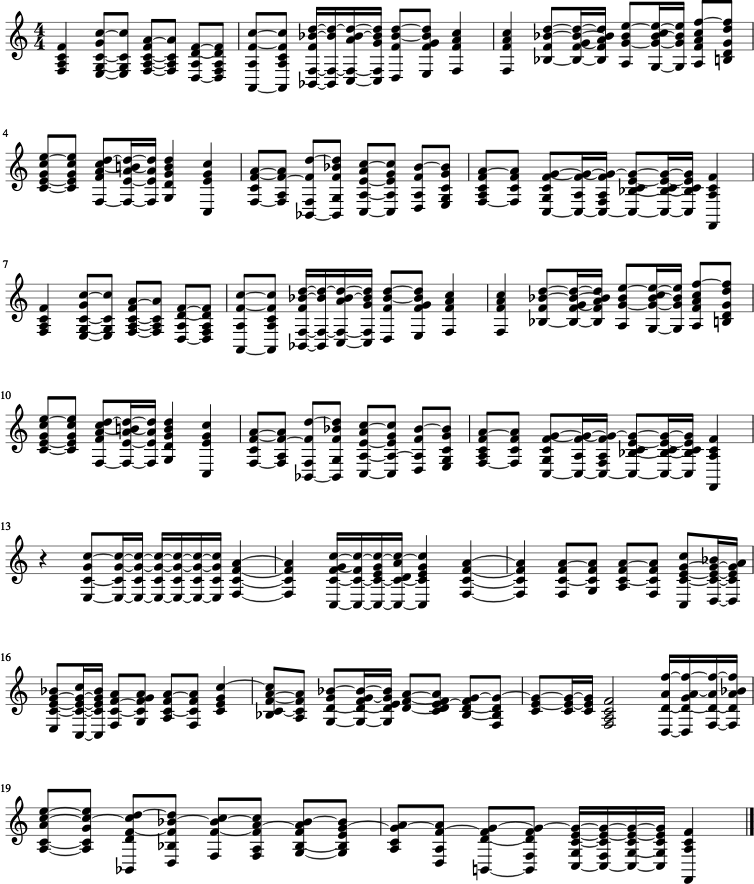

In [267]:
s1.cs.show()

In [268]:
%%time
m1, t1 = s1.get_matrix()

CPU times: user 468 ms, sys: 64.1 ms, total: 532 ms
Wall time: 565 ms


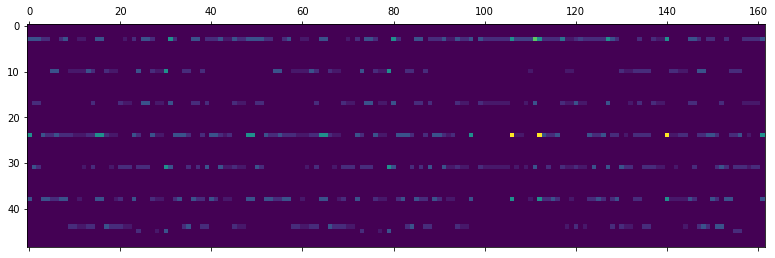

In [269]:
plt.matshow(m1.T)

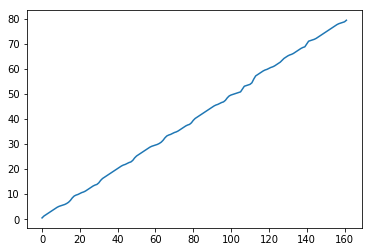

In [270]:
plt.plot(t1)

In [271]:
arr.table.train(corpus.getBachChorales()[:30])

Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv1.6.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv10.7.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv101.7.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv102.7.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv103.6.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv104.6.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv108.6.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv11.6.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/bach/bwv110.7.mxl...
Processing /Users/atadenizaydin/anaconda2/lib/pyth

In [272]:
np.argmax(arr.table.stats.ns)

3

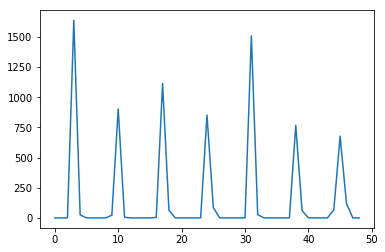

In [273]:
plt.plot(arr.table.stats.ns)

In [98]:
arr.keys.index(s1.key)

11

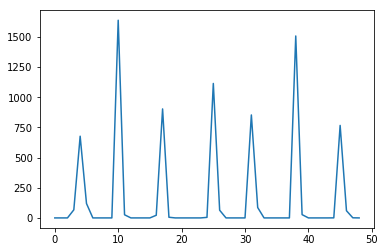

In [281]:
plt.plot(arr.transpose(arr.table.stats.ns, key.Key('D'), False))

In [102]:
p = pitch.Pitch(s1.key.pitches[0], ps=s1.key.pitches[0].ps+1)
p

<music21.pitch.Pitch F#4>

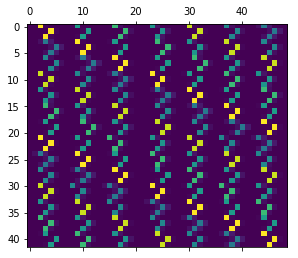

In [279]:
plt.matshow(logprobs(arr.table))

In [307]:
corpus.getComposer('schumann')

[u'/Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/schumann/dichterliebe_no2.xml',
 u'/Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/schumann/opus41no1/movement1.mxl',
 u'/Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/schumann/opus41no1/movement2.mxl',
 u'/Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/schumann/opus41no1/movement3.mxl',
 u'/Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/schumann/opus41no1/movement4.xml',
 u'/Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/schumann/opus41no1/movement5.mxl',
 u'/Users/atadenizaydin/anaconda2/lib/python2.7/site-packages/music21/corpus/schumann/opus48no2.mxl']

In [309]:
s = corpus.parse('schumann/opus41no1/movement2')

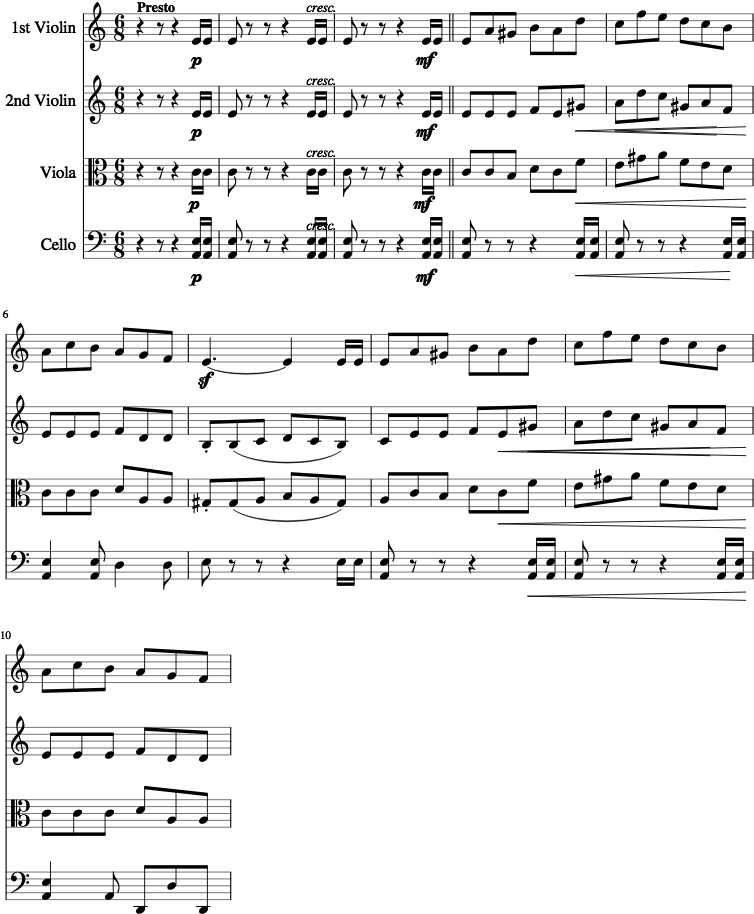

In [310]:
s.measures(1,10).show()

In [434]:
s.show('musicxml')

In [311]:
%%time
sc = arr.Sample(corpus.getComposer('schumann')[2])

CPU times: user 13.7 s, sys: 1.47 s, total: 15.2 s
Wall time: 18.8 s


In [313]:
sc.key

<music21.key.Key of a minor>

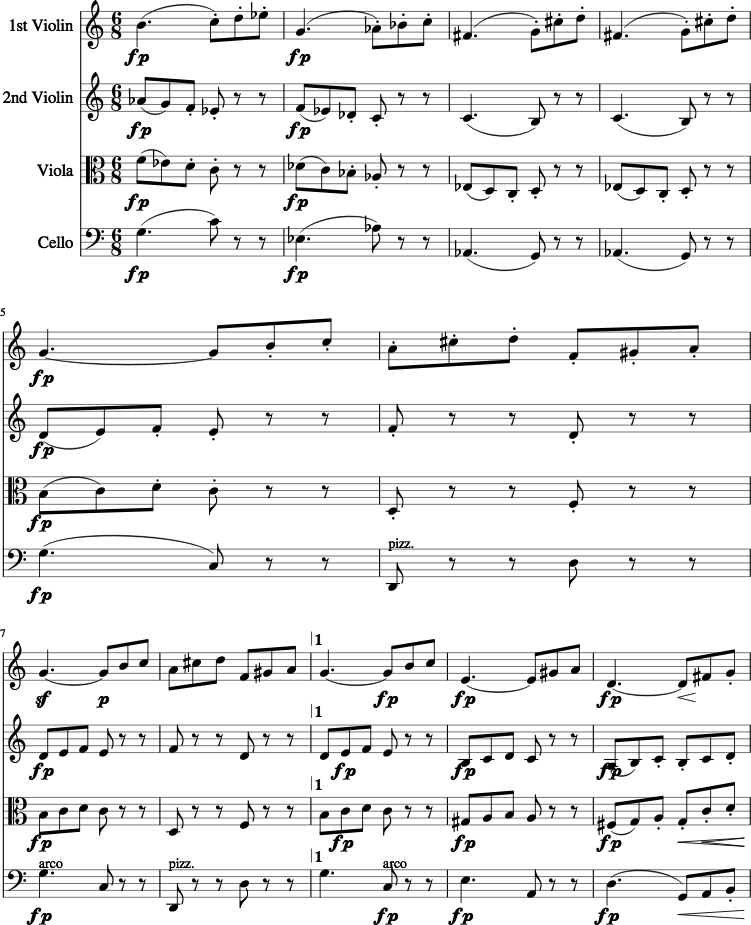

In [325]:
sc.s.measures(40,50).show()

In [327]:
sc.s.measures(40,45).analyze('key')

<music21.key.Key of c minor>

In [315]:
%%time
mc, tc = sc.get_matrix()

CPU times: user 2.55 s, sys: 242 ms, total: 2.8 s
Wall time: 3.58 s


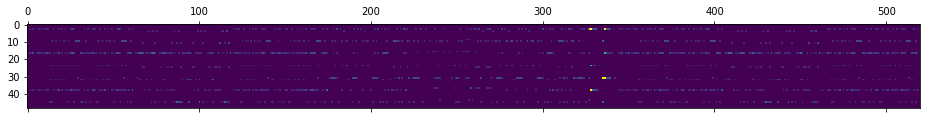

In [316]:
plt.matshow(mc.T)
plt.show()

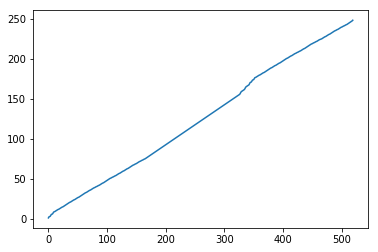

In [317]:
plt.plot(tc)
plt.show()

In [549]:
m = Modulation(arr.table, R=10, maxiter=20, a0=10., b0=10.)

In [550]:
m.fit(mc)

Modulation(R=10, a0=10.0, b0=10.0, eta0=1.0, maxiter=20, table=None, uf0=1.0,
      ul0=1.0)

In [551]:
m.k.shape

(10, 42)

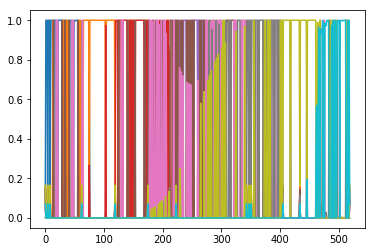

In [552]:
plt.plot(m.w) #==np.max(m.w, axis=1).reshape(-1,1))
plt.show()

In [553]:
# np.argmax(m.k, axis=1)
[arr.keys[i] for i in np.argmax(m.k, axis=1)]

[<music21.key.Key of a minor>,
 <music21.key.Key of E major>,
 <music21.key.Key of a minor>,
 <music21.key.Key of a minor>,
 <music21.key.Key of c minor>,
 <music21.key.Key of G major>,
 <music21.key.Key of C major>,
 <music21.key.Key of a minor>,
 <music21.key.Key of E major>,
 <music21.key.Key of a minor>]

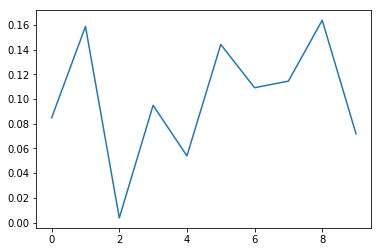

In [554]:
plt.plot((m.ul+1)/(m.ul+1).sum())

In [547]:
np.sqrt(m.b/m.a)

array([[  1.00000000e-01,   6.63459596e+01,   1.05401330e+02,
          7.95691627e+01,   1.00000000e-01]])

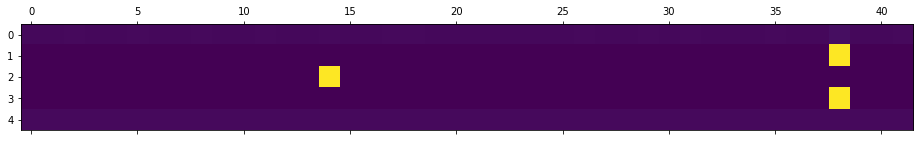

In [548]:
plt.matshow(m.uf)

In [526]:
[arr.keys[i] for i in np.argmax(m.uf, axis=1)]

[<music21.key.Key of a minor>,
 <music21.key.Key of a minor>,
 <music21.key.Key of G major>,
 <music21.key.Key of a minor>,
 <music21.key.Key of E major>]

In [471]:
m.m.shape

(1, 20)

In [472]:
mw1, mk1, muf1, mul1, ma1, mb1, me1, mm1 = m.params[0]

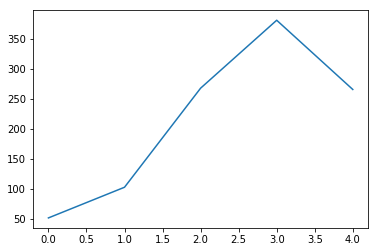

In [527]:
plt.plot(m.m.T)

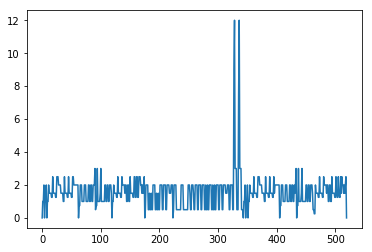

In [474]:
plt.plot(m.ht)

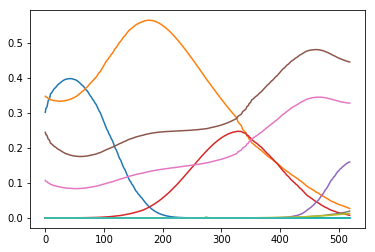

In [555]:
ps = digamma(m.ul) + (-.5*(m.a/m.b*(tc.reshape(-1,1)-m.m)**2 + 1/m.e))
plt.plot(np.exp(ps - logsumexp(ps, axis=1).reshape(-1,1)))
plt.show()